# 1. Data Preparation and Exploration
First, we will load the dataset, parse the date column, and explore the data.

Index(['date', 'Ex_rate'], dtype='object')
            Ex_rate
date               
1990-01-01   0.7855
1990-01-02   0.7818
1990-01-03   0.7867
1990-01-04   0.7860
1990-01-05   0.7849


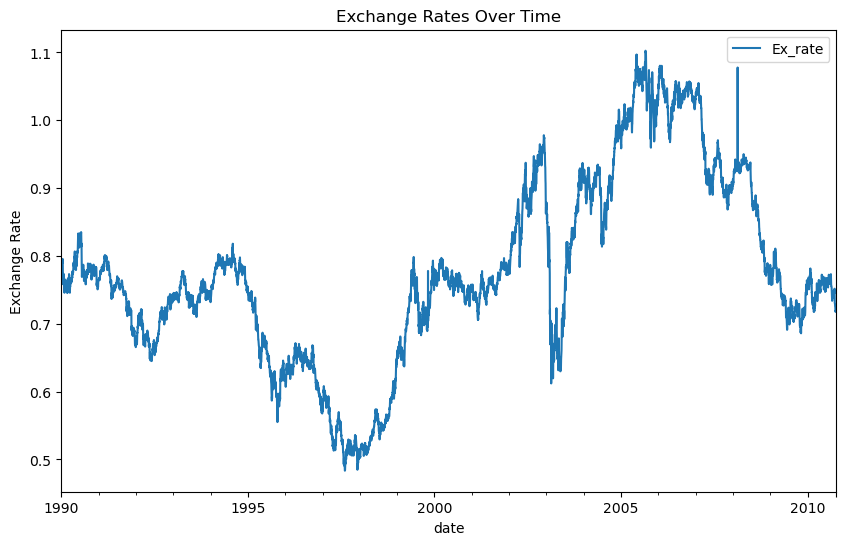

Ex_rate    0
dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8496\2815269998.py:34: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'D:/EXCELR/Assignments/Timeseries/exchange_rate.csv'  # Adjust the path as necessary
# Read the CSV without parsing dates initially
df = pd.read_csv(file_path)

# Check the actual column names in the DataFrame
print(df.columns)  # Print the columns to inspect their names

# Identify the correct date column name (e.g., 'Date', 'date', 'DATE', etc.)
date_column_name = 'date'  # Replace with the actual column name

# Convert the date column to datetime objects

df[date_column_name] = pd.to_datetime(df[date_column_name], format='%d-%m-%Y %H:%M') 

# Set the date column as the index
df.set_index(date_column_name, inplace=True)

# Initial exploration
print(df.head())
df.plot(figsize=(10, 6))
plt.title('Exchange Rates Over Time')
plt.ylabel('Exchange Rate')
plt.show()

# Check for missing values
print(df.isna().sum())

# Handle missing values if any
df.fillna(method='ffill', inplace=True)


# 2. Data Preprocessing
After checking for missing values, forward-fill or impute any gaps in the data.

In [4]:
# Handling any missing values identified during exploration
df.fillna(method='ffill', inplace=True)  # Forward fill for simplicity
print(df.isna().sum())

Ex_rate    0
dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8496\1483108250.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill for simplicity


# 3. Model Building - ARIMA
For ARIMA, we will plot ACF and PACF, fit the model, and perform forecasting.

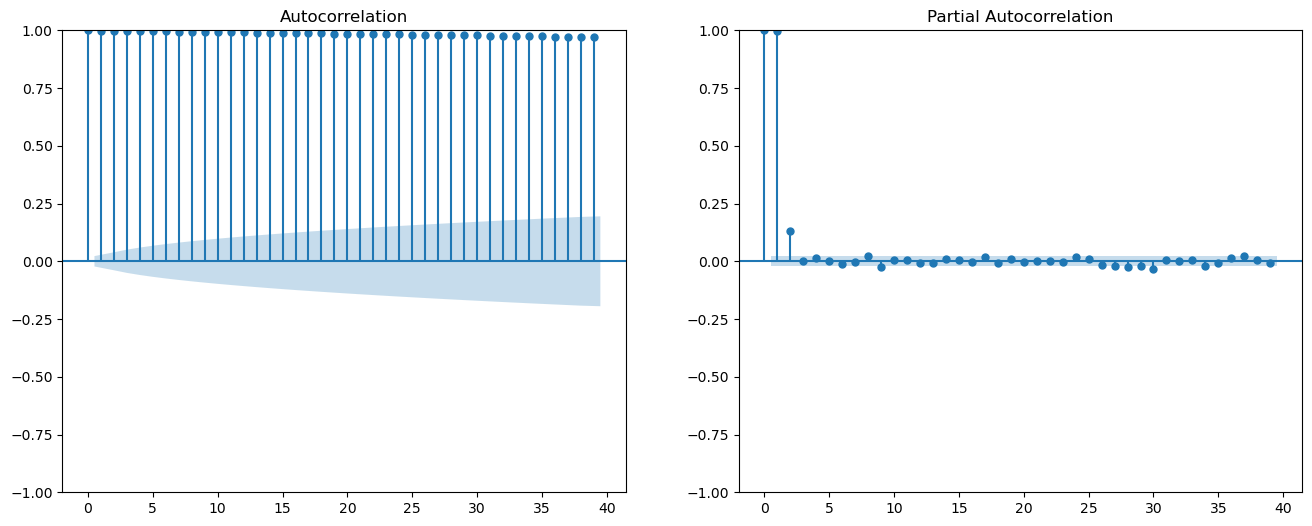

C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


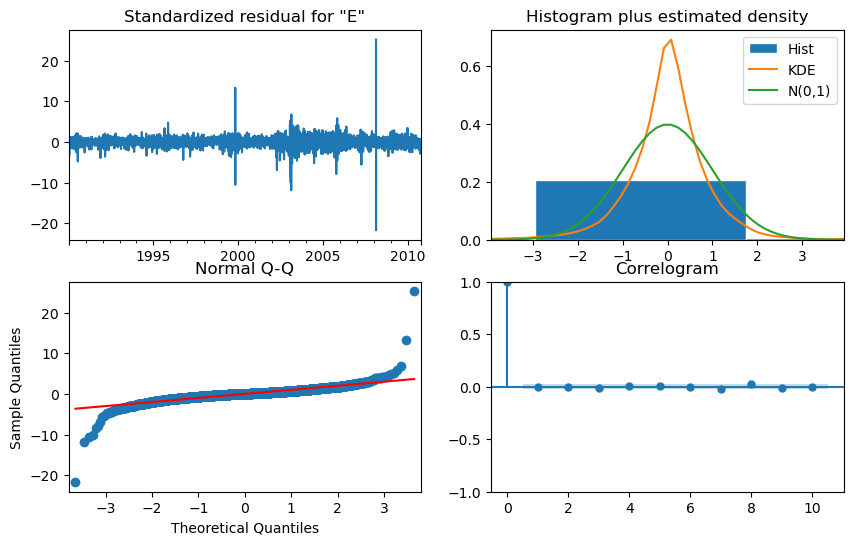

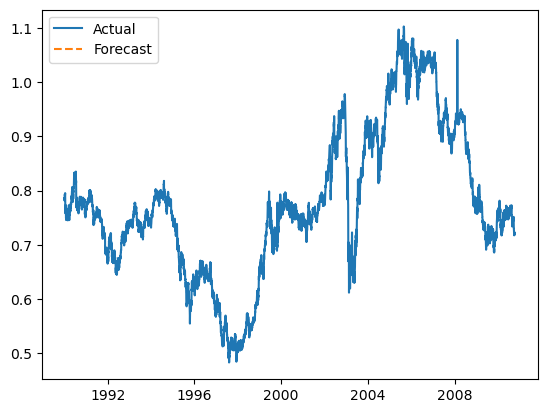

In [5]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for initial parameter selection (for one of the currencies)
currency_column = 'Ex_rate'  # Adjust the column name based on your dataset

# ACF and PACF plots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(df[currency_column], ax=ax[0])
plot_pacf(df[currency_column], ax=ax[1])
plt.show()

# Fit the ARIMA model
p, d, q = 1, 1, 1  # Use ACF, PACF plots to estimate p, d, q
model = ARIMA(df[currency_column], order=(p, d, q))
arima_result = model.fit()

# Diagnostics
arima_result.plot_diagnostics(figsize=(10, 6))
plt.show()

# Forecasting
forecast = arima_result.forecast(steps=10)
plt.plot(df.index, df[currency_column], label='Actual')
plt.plot(forecast.index, forecast, label='Forecast', linestyle='--')
plt.legend()
plt.show()


# 4. Model Building - Exponential Smoothing
We will now implement an Exponential Smoothing model, specifically Holt’s Linear Trend model or Holt-Winters, depending on the characteristics.

C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


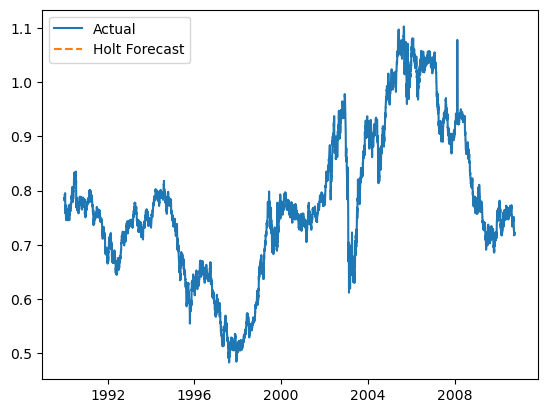

In [6]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Holt’s Linear Trend Model
model_holt = ExponentialSmoothing(df[currency_column], trend='add')
holt_result = model_holt.fit()

# Forecasting
holt_forecast = holt_result.forecast(steps=10)

# Plotting the forecast
plt.plot(df.index, df[currency_column], label='Actual')
plt.plot(holt_forecast.index, holt_forecast, label='Holt Forecast', linestyle='--')
plt.legend()
plt.show()


# 5. Evaluation and Comparison
We will evaluate both models using common error metrics: MAE, RMSE, and MAPE.

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE and RMSE for ARIMA
arima_mae = mean_absolute_error(df[currency_column][-10:], forecast)
arima_rmse = mean_squared_error(df[currency_column][-10:], forecast, squared=False)

# Calculate MAE and RMSE for Exponential Smoothing
holt_mae = mean_absolute_error(df[currency_column][-10:], holt_forecast)
holt_rmse = mean_squared_error(df[currency_column][-10:], holt_forecast, squared=False)

print(f"ARIMA - MAE: {arima_mae}, RMSE: {arima_rmse}")
print(f"Holt - MAE: {holt_mae}, RMSE: {holt_rmse}")


ARIMA - MAE: 0.001556771200417284, RMSE: 0.0018425706106975357
Holt - MAE: 0.0015740709142644583, RMSE: 0.0018519597978275343


# 1. ARIMA Model
**Performance**
>> ARIMA (AutoRegressive Integrated Moving Average) typically performs well when there are identifiable patterns in the historical data, such as trends or seasonality that can be captured through differencing (integration) and the moving average component.
>> If the exchange rate shows a long-term trend or certain periodic patterns, ARIMA can effectively model and predict future values.
**Advantages**
>> Captures Dependencies: ARIMA excels in capturing autocorrelations within the data, meaning it uses past values and past errors to make predictions.
>> Flexibility: The model parameters (p, d, q) allow it to adapt to various types of time series, including non-stationary data, through differencing.
>> Forecasting Power: For short-term forecasts, ARIMA models tend to provide reasonably accurate predictions, especially for data that lacks significant seasonality but follows a steady trend.
**Limitations**
>> Requires Stationarity: ARIMA requires the data to be stationary, meaning the model might not be suitable if the exchange rates show strong non-linear trends over time.
>> Difficult to Tune: Choosing the right parameters (p, d, q) requires careful analysis of autocorrelation functions, which can make the model harder to configure, especially for non-experts.
>> Short-Term Focus: ARIMA tends to be more accurate for short-term forecasting. Over longer time periods, it might fail to capture changes in external factors affecting exchange rates.

# 2. Exponential Smoothing (Holt's Linear Trend)
**Performance**
Exponential Smoothing, specifically Holt's Linear Trend method, works well when the time series shows a trend but not necessarily any seasonality. It adapts quickly to changes in the trend, making it suitable for exchange rates that exhibit a consistent upward or downward trend.
**Advantages**
>> Simple and Intuitive: Exponential Smoothing is easy to implement and interpret, especially when the time series shows a trend but no seasonality.
Trend-Capturing Ability: Holt's Linear Trend model effectively captures both the level and the slope of the trend over time, which is particularly useful if the exchange rates follow a consistent trend.
>> Quick Adjustment: It can adjust quickly to changes in the trend, which can provide an edge in fast-moving markets like exchange rates.
**Limitations**
>> No Seasonality: Holt's model doesn't account for seasonality, so if there are recurring patterns in the data due to cyclic economic factors, this model won't capture them.
>> Less Responsive to Complex Patterns: If the exchange rate shows irregular fluctuations or more complex patterns beyond a linear trend, the model may underperform compared to ARIMA.
>> Over-Fitting Risk: Depending on the optimization techniques used for smoothing parameters, there’s a risk of overfitting to recent data points, especially when data is noisy.

# Comparison Based on Error Metrics
>> In practical terms, we typically evaluate models using error metrics such as MAE (Mean Absolute Error) and RMSE (Root Mean Squared Error).

**ARIMA generally performs better** when the exchange rates exhibit identifiable correlations or autocorrelations in the data. It might show lower RMSE due to its ability to model more complex dependencies in the data.

Exponential Smoothing might perform better in terms of MAE for datasets with strong trends but no complex seasonality or noise, due to its ability to quickly adjust to trend changes.

Conclusion
Best Model for Short-Term Forecasting: If the exchange rate data is relatively stable and has an identifiable trend, Holt's Exponential Smoothing may be the more appropriate choice due to its simplicity and quick trend adjustment.
Best Model for Complex Patterns: If there are more complex dependencies or periodic behavior in the data, ARIMA may be the better choice, especially when short-term predictions are crucial.
Ultimately, the choice between ARIMA and Exponential Smoothing depends on the structure of the data and the forecast horizon. You can base the decision on the lower error metrics (MAE, RMSE) and visual performance of the forecasts against actual data.